<table align="left" style="border-style: hidden" class="table"> <tr><td class="col-md-2"><img style="float" src="../icon_sp21.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Fall 2021</h4><p>Ani Adhikari</p>CC BY-NC 4.0</div></td></tr></table><!-- not in pdf -->

This content is protected and may not be shared, uploaded, or distributed.

In [1]:
# SETUP
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from datascience import *
from prob140 import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Useful for probability calculations
from scipy import stats

# Lab 2: Total Variation 

## Lab Resources

* [`prob 140` Library Documentation](http://prob140.org/prob140/)
* [`datascience` Library Documentation](http://data8.org/datascience/)
* [Data 140 Code Reference Sheet](http://prob140.org/assets/prob140_code_reference.pdf)

In Data 8, you measured the difference between two categorical distributions by calculating the total variation distance between them. In this lab, you will start by interpreting the total variation distance (TVD) in terms of probabilities. You will then use total variation distance to measure the difference between two probability distributions on the non-negative integers. 

This will give you a way to quantify how well one distribution approximates another. 

The focus will be on [Poisson distributions](http://prob140.org/textbook/content/Chapter_07/00_Poissonization.html), which are often used as approximations to distributions of counts of rare events. In particular, the Poisson $(1)$ distribution approximates the distributions of some random counts that have $1$ as their most likely value.

A random variable $X$ has the Poisson $(1)$ distribution if

$$
P(X = k) ~ = ~ e^{-1} \frac{1}{k!}, ~~~ k \ge 0
$$

This is a probability distribution on infinitely many possible values. We will need that infinite support if we are going to approximate distributions on the values $0, 1, 2, \ldots, n$ for arbitrarily large $n$.

In class we are studying a situation in which probabilities approach those in a Poisson distribution: counting the number of successes in $n$ i.i.d. Bernoulli $(p)$ trials, for large $n$ and small $p$.

In this lab you will look at the binomial $(n, 1/n)$ distributions and compare them with their Poisson $(1)$ approximations, both visually and also by a numerical measure of the distance between two distributions. In doing so, you will find an upper bound for the amount of error when you use the approximations instead of the exact probabilities.

What you will learn:
- The Data 8 definition of total variation distance (TVD) and its interpretation in terms of the amount of error in approximating probabilities
- For large $n$, properties of the TVD between the binomial $(n, 1/n)$ and Poisson $(1)$ distributions
- The proof of why the Data 8 definition of the TVD measures the worst error you can make in using one distribution to approximate another.

## Instructions
Your labs have two components: a written portion and a portion that also involves code. Written work should be completed on paper, and coding questions should be done in the notebook. You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the lab are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

## Part 1: Total Variation Distance ##

Suppose you have two probability distributions on the same set of possible values $x_1, x_2, \ldots , x_n$. Let the two distributions be $b_1, b_2, \ldots, b_n$ and $g_1, g_2, \ldots, g_n$, where for each $i$ the $b$-distribution assigns probability $b_i$ to the value $x_i$ and the $g$-distribution assigns probability $g_i$.

The *total variation distance* between the two distributions is defined by

$$
\text{tvd}(b, g) = 
\frac{1}{2} \sum_{i=1}^n |b_i - g_i| 
$$

The choice of notation comes from the blue and gold colors you will see in overlaid histograms below.

### 1a) Computing TVD ###
Define a function `tvd` that takes two probability arrays as arguments and returns the total variation distance between them. You should just assume that both of the input arrays will be probability distributions. You don't have to include code to check that each array is non-negative and sums to $1$.

In [5]:
def tvd(b, g):
    return sum(abs(b-g))/2

When the two arrays are $b = [0.4, 0.3, 0.2, 0.1]$ and $g = [0.25, 0.35, 0.25, 0.15]$, the histograms look like this:

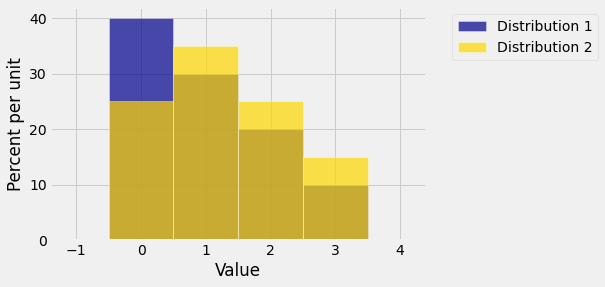

In [6]:
b = make_array(0.4, 0.3, 0.2, 0.1)
g = make_array(0.25, 0.35, 0.25, 0.15)

k = np.arange(4)

blue_dist = Table().values(k).probabilities(b)
gold_dist = Table().values(k).probabilities(g)

Plots('Distribution 1', blue_dist, 'Distribution 2', gold_dist)

Calculate the TVD by mental math. Then run the cell below to confirm that your function `tvd` is working correctly.

In [7]:
tvd(b, g)

0.15

The total variation distance between the two distributions is the total amount by which the areas of the blue bars exceed those of the corresponding gold bars. That's exactly equal to the total amount by which the gold bars exceed the blue.

This is almost apparent from the definition of total variation distance, and you will prove it later in this lab. Just assume it for now as you did in Data 8. It is an intuitively reasonable measure of the difference between the two distributions.

### 1b) Another Way of Interpreting TVD ###

Thus far, our interpretation of total variation distance has been essentially geometric: the amount by which the blue bars exceed the gold. There is an equivalent interpretation in terms of probabilities that makes it easier to understand what the numerical value of the distance is telling us.

Suppose you have a finite set of possible values, and a choice of two probability distributions to use for finding probabilities. For example, the choices might be the exact distribution of a random variable and an approximate distribution. 

**The total variation distance between the two distributions is the biggest difference you can possibly get if you compute the probability of an event using each of the two distributions.**

Formally, if $S$ is the space of all possible values, then the total variation distance between the blue and gold distributions is equal to

$$
\max\left\{ \left\lvert P_{blue}(A) - P_{gold}(A) \right\rvert : A \subseteq S\right\}
$$

This can be shown in a few straightforward steps, which you will do later in this lab. For now, confirm that it is true for the distributions in **1a**, in the following steps.

- Figure out how many events can be created out of the outcomes $\{0, 1, 2, 3\}$.
- List all the events.
- For each event, compute the absolute difference between the blue and gold probabilities of the event. Your goal is to find the biggest possible absolute difference, so you might not even need to compute each one.
- See which event or events correspond to the biggest absolute difference, and compare the value of that absolute difference with the TVD that you computed in **1a**.

#newpage

## Part 2. Poisson $(1)$ Approximation to Binomial Distributions ##

Recall that $X$ has the Poisson distribution with parameter 1 if 

$$
P(X = k) ~ = ~ e^{-1} \frac{1}{k!}, ~~~ k \ge 0
$$

The `stats` module of SciPy can be used to calculate the probabilities in this distribution. If `values` is an array of non-negative integers, then

`stats.poisson.pmf(values, 1)`

evaluates to an array of probabilities of the entries in `values`, determined by the Poisson $(1)$ formula above.

The acronym `pmf` stands for "probability mass function". It is common for probabilists to think of the probabilities in the distribution of a discrete random variable as masses attached to the random variable's possible values. 

The textbook has a useful [review](http://prob140.org/textbook/content/Chapter_07/00_Poissonization.html#an-interpretation-of-the-parameter) of how to plot probability histograms.

### 2a) The Poisson $(1)$ Distribution ###
Draw a histogram of the Poisson $(1)$ distribution.

In [ ]:
k = np.arange(11)        # selected possible values
poisson_1_probs = ...    # array of corresponding Poisson (1) probabilities
poisson_1_dist = ...
Plot(poisson_1_dist)
plt.title('Poisson (1) Distribution');

Notice:

- The distribution has two modes, at 0 and 1. In exercises you will see why.
- Though there are infinitely many possible values, the set of *probable* values is very small — there is hardly any probability visible beyond the value 4.

Roughly stated, a theorem we proved in class says that if $n$ is large and $p$ is small, then the binomial $(n, p)$ probabilities are close to Poisson $(np)$ probabilities. 

Therefore, for large $n$ binomial $(n, 1/n)$ probabilities should be close to Poisson $(1)$ probabilities.

### 2b) Binomial $(10, 1/10)$ Distribution ###
If `values` is an array of integers in the range 0 through $n$, then

`stats.binom.pmf(values, n, p)`

evaluates to an array of the binomial $(n, p)$ probabilities of the entries in `values`.

Display a histogram of the binomial $(10, 1/10)$ distribution. Notice how the probabilities are concentrated on the low values. This is a signal to start thinking about Poisson approximations, even though the number of trials ($n = 10$) isn't very large.

In [ ]:
# binomial (10, 1/10) distribution

k = ...                            # possible values
binom_probs = ...                  # binomial (10, 1/10) probabilities


binom_dist = ...

Plot(binom_dist)
plt.title('Binomial (10, 1/10) Distribution');

Since $n = 10$ isn't very large, this distribution doesn't look exactly like the Poisson $(1)$ distribution though the two have many similarities. Run the cell below to see the overlaid histograms.

In [ ]:
k = np.arange(11)
poisson_1_probs = stats.poisson.pmf(k, 1)
poisson_1_dist = Table().values(k).probabilities(poisson_1_probs)

Plots('Binomial (10, 1/10)', binom_dist, 'Poisson (1)', poisson_1_dist)

### 2c) Binomial $(100, 1/100)$ Distribution ###
The Poisson $(1)$ approximation gets better as $n$ increases. To see this, draw overlaid histograms of the binomial $(100, 1/100)$ distribution and the Poisson $(1)$ distribution. 

You can use as many lines as you need for the code. As you can see from the histograms above, it's quite safe to draw the distributions over only the values $0$ through $10$.

In [ ]:
...

In [ ]:
poisson_1_dist

## Part 3: TVD between the Binomial $(n, 1/n)$ Distribution and its Poisson Approximation ##

You can now quantify how good the Poisson approximation is.

### 3a) Computing the TVD ###
Define a function `binomial_Poisson_tvd` that takes $n$ as its argument and returns the total variation distance between the binomial $(n, 1/n)$ and Poisson $(1)$ distributions. 

Use as many lines of code as you need. It's fine to compute the Poisson $(1)$ probabilities only on the values $0$ through $n$, which are the possible values of the binomial.

In [ ]:
def binomial_Poisson_tvd(n):
    ...

As a check to see if your function is working correctly, run the cell below. The output should be about $1$%.

In [ ]:
binomial_Poisson_tvd(30)

### 3b) Error in Approximation ###
Now see what happens as $n$ gets large. Extend `tvd_table` defined below with a column labeled `'Binomial (n, 1/n)'` that contains the TVD between the binomial $(n, 1/n)$ and Poisson $(1)$ distributions, where in each row $n$ is given by the entry in Column 0.

In [ ]:
tvd_table = Table().with_columns('n', np.arange(5, 101))

# array of tvds
bin_Poi_tvds = tvd_table...

tvd_table = tvd_table...

tvd_table

Run the cell below to plot the TVD as a function of $n$.

In [ ]:
tvd_table.plot(0)

Fill in the blanks (use the code cell below if you need to):

For values of $n$ that are about $\underline{~~~~~~~~~~~~~~~~}$ or more, Poisson $(1)$ approximations to binomial $(n, 1/n)$ probabilities will be off by at most 0.5%. 


**Your answer here**

In [ ]:
...

Now you can use total variation distance to help answer the question, "How large does $n$ have to be before I can use the Poisson $(1)$ approximation to the binomial $(n, 1/n)$ distribution?" 

- First decide how much error you are prepared to tolerate in your approximations. 
- Then use `tvd_table` (or an extended one with larger values of $n$) to find the smallest $n$ for which the TVD is below your threshold error. 
- For that $n$ or larger, the error in your Poisson $(1)$ approximations to binomial $(n, 1/n)$ probabilities will be below your threshold.

# Part A of the lab ends here, and is due by 11:59 pm Monday September 13 #

#newpage

## Part 4: A Simple Bound for the TVD ###

You have calculated the TVD by calculating both the exact binomial and the approximate Poisson probabilities, and you have seen that the TVD is small for large $n$.

But what's the point of approximations and TVD if we have to compute the exact binomial probabilities to get the TVD in the first place?

In fact there is no point in approximation if you can just find the exact chance. But for large enough $n$, the computations become infeasible. So probabilists have worked out simple mathematical upper bounds on the TVD between the Poisson and binomial (or binomial-like) distributions. The fundamental work in this area was by the late [Prof. Lucien LeCam](https://en.wikipedia.org/wiki/Lucien_Le_Cam) of the Statistics department at Berkeley.

### 4a) [Written] LeCam's Theorem ###

Read the statement of [LeCam's Theorem](https://en.wikipedia.org/wiki/Le_Cam%27s_theorem). It is about the Poisson approximation to the *Poisson-binomial* distribution. That's the distribution of the sum of independent indicators that need not be identically distributed.

First explain why the binomial distribution is a special case of the Poisson binomial distribution.

Then figure out how LeCam's theorem applies to the approximation you are studying in this lab, and hence find LeCam's upper bound on the TVD between the binomial $(n, 1/n)$ distribution and its Poisson $(1)$ approximation.

You just have to apply the theorem carefully. Think about what the $p_i$'s have to be, and be careful about factors of 2.

### 4b) Confirming the Upper Bound ###
The proof of LeCam's theorem is beyond the scope of this course. But you can check that the theorem does indeed give an upper bound, by drawing overlaid plots of the TVD and the bound.

Complete the cell below to augment `tvd_table` with a column `"LeCam's Bound"` that contains the bound you found in **a**, and draw the overlaid plots. 

The limits on the vertical axis have been chosen for comparability with the plot in Part **3b**.

In [ ]:
tvd_table = tvd_table.with_columns(
    "LeCam's Bound", ...
)

tvd_table.plot(0)
plt.ylim(0, 0.06);

### 4c) Using the Bound ###

Fill in the blank without calculation. 

If you use the Poisson $(1)$ distribution to approximate binomial $(1000, 1/1000)$ probabilities, the worst error you can make is no more than $\underline{~~~~~~~~~~~~~~~~~~~~}$.


**Your answer here**

#newpage

## Part 5: Biggest Possible Error ##

To conclude the lab, you are going to prove that the TVD can be interpreted as a maximum difference of probabilities.

We are going to compare two probability distributions $P_{\text{blue}}$ and $P_{\text{gold}}$ on a finite set of values $S$. Suppose the values are labeled $1, 2, \ldots, n$. 

The *total variation distance between $P_{\text{blue}}$ and $P_{\text{gold}}$* is defined as

$$
\| P_{\text{blue}} - P_{\text{gold}}\|_{\text{TVD}} ~ = ~
\max\{ \lvert P_{\text{blue}}(A) - P_{\text{gold}}(A) \rvert : A \subseteq S\}
$$

The definition says: For every event $A$, compute how far off $P_{\text{blue}}(A)$ is from $P_{\text{gold}}(A)$. The TVD is the biggest value among all these differences.

That doesn't look at all like what we have been calculating as the TVD starting way back in Data 8. But in fact it's the same thing. It's your job to show how. 

Before you get started, confirm your understanding of the definition. Suppose you calculate the TVD between two distributions and get 0.003. That says that if you list all possible events and compare their probabilities under the two distributions, the biggest difference you will get is 3/1000. The two distributions are pretty close. 

The goal of this part of the lab is to show that this new definition of TVD is equivalent to the calculation we have been doing all along. Let's start by setting up some notation. For each $i$ in $S$, let $P_{\text{blue}}(i) = b_i$ and let $P_{\text{gold}}(i) = g_i$. If you imagine a bar graph or histogram of each distribution, then $b_i$ is the area of the blue bar at the value $i$, and $g_i$ is the area of the gold bar at $i$.

In this notation, our familiar calculation of the TVD is

$$
\frac{1}{2} \sum_{i \in S} \lvert b_i - g_i \rvert
$$

In this question and the next you will show that 

$$
\max\{ \lvert P_{\text{blue}}(A) - P_{\text{gold}}(A) \rvert : A \subseteq S\} ~ = ~ 
\frac{1}{2} \sum_{i \in S} \lvert b_i - g_i \rvert
$$

Three events will be important in the calculations.

The set of values for which the blue bars exceed the gold:
$$
B = \{i: b_i > g_i\}
$$

The set of values for which the gold bars exceed the blue:
$$
G = \{i: g_i > b_i\}
$$

The set of values for which the blue bars and gold bars are equal:
$$
E = \{i: b_i = g_i\}
$$

Keep in mind that for any event $A$,
$$
P_{\text{blue}}(A) = \sum_{i \in A} b_i ~~~~~~~ \text{and} ~~~~~~~
P_{\text{gold}}(A) = \sum_{i \in A} g_i
$$

### This part of the lab is entirely written. There is no code. ###

### 5a) ###
Find the value of
$$
\sum_{i \in B} b_i ~ + ~ 
\sum_{i \in G} b_i ~ + ~ 
\sum_{i \in E} b_i 
$$

Repeat the calculation after replacing $b_i$ by $g_i$ in all three sums above.

Hence show that
$$
\sum_{i \in B} (b_i - g_i) ~ = ~ \sum_{i \in G} (g_i - b_i)
$$

This proves a statement we have made in Data 8 and Lab 2: "The amount by which the blue bars exceed the gold is the same as the amount by which the gold bars exceed the blue." 

### 5b) ###
Our usual calculation of TVD is
$$
\frac{1}{2} \sum_{i \in S} \lvert b_i - g_i \rvert
$$

Partition the sum into two pieces to show that

$$
\frac{1}{2} \sum_{i \in S} \lvert b_i - g_i \rvert ~ = ~
\sum_{i \in B} (b_i - g_i) ~ = ~ \sum_{i \in G} (g_i - b_i)
$$

This proves another statement we made in Data 8 and Lab 2: "The TVD is the amount by which the blue bars exceed the gold."

### 5c) ###
Now let $A$ be any event. Show that 
$$
P_{\text{blue}}(A) - P_{\text{gold}}(A) ~ = ~ 
\sum_{i \in AB} (b_i - g_i) ~ - ~ \sum_{i \in AG} (g_i - b_i)
$$

Hence show that
$$
P_{\text{blue}}(A) - P_{\text{gold}}(A) ~ \le ~ 
\sum_{i \in AB} (b_i - g_i) ~~~~~~ \text{and} ~~~~~~
P_{\text{gold}}(A) - P_{\text{blue}}(A) ~ \le ~ 
\sum_{i \in AG} (g_i - b_i)
$$

### 5d) ###
Use the first of the two inequalities in **c** to show that if $P_{\text{blue}}(A) - P_{\text{gold}}(A) > 0$ then

$$
\lvert P_{\text{blue}}(A) - P_{\text{gold}}(A) \rvert ~ \le ~ \sum_{i \in B} (b_i - g_i)
$$

Use the second of the two inequalities in **c** to show that if $P_{\text{blue}}(A) - P_{\text{gold}}(A) < 0$ then

$$
\lvert P_{\text{blue}}(A) - P_{\text{gold}}(A) \rvert ~ \le ~ \sum_{i \in G} (g_i - b_i)
$$

### 5e) ###
Identify an event for which one of the inequalities in **d** is an equality.

Explain why you now have a complete proof of

$$
\max\{ \lvert P_{\text{blue}}(A) - P_{\text{gold}}(A) \rvert : A \subseteq S\} ~ = ~ 
\frac{1}{2} \sum_{i \in S} \lvert b_i - g_i \rvert
$$

That is, our usual calculation of the TVD is equivalent to finding the biggest difference between probabilities assigned by the two distributions to any event.

## Conclusion ##
What you have learned in this lab:
- Many random variables in this lab have a large number of possible values, and the approximating Poisson distribution has infinitely many possible values. But no matter how large $n$ is, the *probable* values of all the variables are in a very small range — 0 through about 8 or 10 — because all of the distributions are roughly Poisson $(1)$.
- If you use an approximation to the distribution of $X$, then the total variation distance between the exact and approximate distributions measures the worst error you can make in approximating probabilities of events determined by $X$. 
- The total variation distance between the binomial $(n, 1/n)$ and Poisson $(1)$ distributions falls sharply as a function of $n$ and is below 1% even for moderate values of $n$.
- There is a simple upper bound for this total variation distance.

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###

- Scan all the pages into a PDF. You can use any scanner or mobile application. There are many free apps available that allow you to convert your work into PDFs from your phone. Please DO NOT simply take pictures using your phone.
- Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image or fold your page over (the old-fashioned way). This helps expedite grading.
- It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###

- Save your notebook using File > Save and Checkpoint.
- Generate a PDF file using File > Download as > PDF via LaTeX. This might take a few seconds and will automatically download a PDF version of this notebook.
    - If you have issues, please make a follow-up post on the general Lab 2 Ed thread.

### Submitting ###

- Combine the PDFs from the written and code portions into one PDF. [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so.
- Submit the assignment to Lab 1 on Gradescope.
- **Make sure to assign each page of your pdf to the correct question.**
- It is your responsibility to verify that all of your work shows up in your final PDF submission.
- If you have questions about scanning or uploading your work, please post a follow-up to the [Ed thread](https://edstem.org/us/courses/12163/discussion/571594) on this topic.